# 📖 Introducción

**Introducción** <br>
En este trabajo se aborda el análisis de la relación entre el salario de los empleados del área de Data Science y su perfil laboral. Se busca responder preguntas como ¿Cómo influye el nivel de experiencia en el salario? ¿Hay diferencias salariales entre empleados que trabajan de forma remota y los que no?<br>

**Audiencia**<br>
Este estudio está dirigido a empresas que buscan conocer la tendencia salarial de los empleados en el área de Data Science y a los empleados que buscan negociar mejores salarios en función de su perfil. Además, podría ser de utilidad para estudiantes que buscan orientación sobre qué áreas de estudio podrían ser más rentables a largo plazo y para los profesionales que buscan explorar otras áreas de trabajo.<br>

**Temática** <br>
La temática que se aborda en este trabajo es la relación entre el salario de los empleados del área de Data Science y su perfil laboral, teniendo en cuenta variables como el nivel de experiencia, la ubicación geográfica, el tipo de empresa en la que trabajan y si desempeñan su trabajo de forma remota o presencial. El objetivo principal es obtener información útil y precisa para las empresas y empleados que buscan tomar decisiones basadas en datos en cuanto a los salarios del área de Data Science.<br> <br>

### 📜 **Storytelling**


##### **Contexto Comercial:** Somos una empresa que brinda servicios de consultoría en el área de recursos humanos. Uno de nuestros clientes es una compañía de tecnología que está interesada en mejorar su estrategia de retención de talentos.

##### **Problema Comercial**: Nuestro trabajo es analizar el conjunto de datos proporcionados por la empresa cliente y encontrar patrones y tendencias que puedan ayudar a mejorar la retención de talentos. En particular, queremos entender cómo las condiciones laborales (como el salario, el tipo de contrato, la ubicación, etc.) influyen en la decisión de los empleados de permanecer en la empresa o buscar oportunidades en otro lugar.

#### **Objetivo**: El objetivo de este análisis es proporcionar una exploración detallada de los datos y brindar información precisa al empleador para responder a sus preguntas y obtener información valiosa sobre los salarios en la empresa.

**Preguntas**
```
a) El nivel de salario aumenta con base en la cantidad de experiencia que posea el empleado?
b) Los salarios aumentaron o decrecieron con el paso de los años?
c) Pagamos mejor a los trabajadores en remoto, o los presenciales?
d) Que área específica pagamos más?
e) Hay más trabajadores en remoto, o presenciales?
f) Las compañías grandes pagan más?
g) Aumenta según el tipo de contratación?
h) Donde reside el empleado, tiene variabilidad en los salarios?
```


#### Estas preguntas serán nuestro punto de partida para explorar los datos y responder a las inquietudes de nuestro cliente. Con ellas como guía, buscaremos obtener insights valiosos y finalizar cualquier duda o consulta que pueda tener

# ✈️Contexto analítico

Se observan las librerías a utilizar para el EDA. 

In [351]:
%pip install mlxtend --quiet 
%pip install plotly_express==0.4.0 --quiet 
%pip install xgboost --quiet
%pip install tabulate --quiet


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [352]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy
import plotly.express as px
import warnings
from tabulate import tabulate

## 💡 Data Adquisition

In [353]:
%cd C:\Users\leand\Desktop\Data Science\Excel
df_salary = pd.read_csv("datascience_salaries.csv",sep=',')

C:\Users\leand\Desktop\Data Science\Excel


#### El dataset proporcionado por la empresa incluye información sobre el salario y las condiciones laborales de los empleados en el campo de la Ciencia de Datos. El dataset está en formato CSV y consta de varias columnas que contienen detalles sobre el año de trabajo, el nivel de experiencia, el tipo de contrato, el título del trabajo, el salario y la moneda utilizada, así como el salario en dólares. También se incluyen detalles sobre la residencia del empleado, si trabaja en remoto, híbrido o de forma presencial, la localización o región de la empresa y el tamaño de la empresa. <br>
#### Debajo, una breve descripcion de las columnas del dataset.

* **Work_Year**: Año de trabajo.<br>
* **Experience_Level**: Nivel de experiencia.<br>
* **Employment_Type**: Tipo de contratacion.<br>
* **Job_Title**: Titulo del trabajo.<br>
* **Salary**: Salario.<br>
* **Salary_Currency**: Tipo de moneda utilizada en el salario.<br>
* **Salary_In_USD**: Salario en dolares.<br>
* **Emplyee_Recience**: Recidencia del empleado.<br>
* **Remote_Ratio**: Si trabaja en remoto, hibrido o precencial.<br>
* **Company_Location**: Localizacion o region de la empresa.<br>
* **Company_Size**: Tamaño de la empresa.<br>

In [354]:
df_salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# 🔎Data Wranling

En esa examinacion, se han realizado los ajustes de limpieza necesarios para dejar listos los datos para análisis. <br>
Detallaremos los cambios a continuación:<br>
* Se han analizado los datos.
  * Valores nulos.
  * Valores duplicados.
* Se han detallado de mejor manera algunas columnas para mejorar la claridad en el análisis.
* Se ha eliminado la columna de index, dado que no es necesario.
* Se ha eliminado la columna en salario en distintas monedas, ya que trabajaremos enteramente con dolares americanos. Junto con la columna de divisa.
* Se ha realizado una copia para trabajar con un encoder (categoricas a numericas), y realizamos otra copia para los algoritmos de aprendizaje automático.
* Se ha realizado una escala logarítmica dado que los salarios en dolares son muy altos.
* Limitaremos los valores de residencia aquellos que sean mayor de 20 al momento de trabajar con los algoritmos de aprendizaje automatico

### Valores nulos

In [355]:
df_salary.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [356]:
df_salary.isna().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Nos cercioramos de que el dataset no tenga datos NaN
Y en conclusion determinamos que el dataset no tiene ni valores nulos, ni duplicados.

### Reclasificacion

In [357]:
df_salary['experience_level'] = df_salary['experience_level'].replace('EN','Junior') 
df_salary['experience_level'] = df_salary['experience_level'].replace('MI','Mid_Junior')
df_salary['experience_level'] = df_salary['experience_level'].replace('SE','Senior')
df_salary['experience_level'] = df_salary['experience_level'].replace('EX','Ejecutivo')

In [358]:
df_salary['employment_type'] = df_salary['employment_type'].replace('PT','Medio_Tiempo')
df_salary['employment_type'] = df_salary['employment_type'].replace('FT','Full_Time')
df_salary['employment_type'] = df_salary['employment_type'].replace('CT','Contrato')
df_salary['employment_type'] = df_salary['employment_type'].replace('FL','Freelance')

In [359]:
df_salary = df_salary.rename(columns={
    'work_year': 'Anio_Laboral',
    'experience_level': 'Nivel_de_experiencia',
    'employment_type': 'Tipo_de_contrato',
    'job_title': 'Titulo_de_trabajo',
    'salary_in_usd': 'Salario_en_dolares',
    'employee_residence': 'Residencia_del_empleado',
    'remote_ratio': 'Ratio_remoto',
    'company_location': 'Localizacion_de_la_compania',
    'company_size': 'Tamanio_de_compania'
})


In [360]:
np.log(df_salary["Salario_en_dolares"])

0     11.29
1     12.47
2     11.60
3      9.90
4     11.92
       ... 
602   11.94
603   11.74
604   11.77
605   11.92
606   12.21
Name: Salario_en_dolares, Length: 607, dtype: float64

### Eliminacion de la columnas

In [361]:
del df_salary['Unnamed: 0']

In [362]:
del df_salary['salary']
del df_salary['salary_currency']

### Copia de Salary

In [363]:
df_salaryML_LabelEncoder = df_salary.copy()

In [364]:
value_counts = df_salaryML_LabelEncoder["Residencia_del_empleado"].value_counts()
categorias_interes = value_counts[value_counts > 15].index.tolist()
df_salaryML_LabelEncoder = df_salaryML_LabelEncoder[df_salaryML_LabelEncoder["Residencia_del_empleado"].isin(categorias_interes)]


### En la copia, pasaremos las variables cateogricas a numericas

In [365]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_salaryML_LabelEncoder['Tipo_de_contrato'] = encoder.fit_transform(df_salaryML_LabelEncoder['Tipo_de_contrato'])
df_salaryML_LabelEncoder['Nivel_de_experiencia'] = encoder.fit_transform(df_salaryML_LabelEncoder['Nivel_de_experiencia'])
df_salaryML_LabelEncoder['Residencia_del_empleado'] = encoder.fit_transform(df_salaryML_LabelEncoder['Residencia_del_empleado'])
df_salaryML_LabelEncoder['Localizacion_de_la_compania'] = encoder.fit_transform(df_salaryML_LabelEncoder['Localizacion_de_la_compania'])
df_salaryML_LabelEncoder['Tamanio_de_compania'] = encoder.fit_transform(df_salaryML_LabelEncoder['Tamanio_de_compania'])
df_salaryML_LabelEncoder['Titulo_de_trabajo'] = encoder.fit_transform(df_salaryML_LabelEncoder['Titulo_de_trabajo'])

In [366]:
df_salaryML_LabelEncoder.head()

,Anio_Laboral,Nivel_de_experiencia,Tipo_de_contrato,Titulo_de_trabajo,Salario_en_dolares,Residencia_del_empleado,Ratio_remoto,Localizacion_de_la_compania,Tamanio_de_compania
0,2020,2,2,21,79833,1,0,4,0
2,2020,3,2,7,109024,3,50,7,1
4,2020,3,2,36,150000,5,50,10,0
5,2020,1,2,11,72000,5,100,10,0
6,2020,3,2,32,190000,5,100,10,2


# 🤖 Comienzo el desarrollo, comprobacion de valores nulos y duplicados

#### Comienzo el desarrollo de los datos, comenzamos con un encabezado que nos traera los datos en el DF.

In [367]:
table = tabulate(df_salary.info(), headers=["Columna", "No Nulos", "Tipo de datos"], tablefmt="pipe", showindex=False)
print(table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Anio_Laboral                 607 non-null    int64 
 1   Nivel_de_experiencia         607 non-null    object
 2   Tipo_de_contrato             607 non-null    object
 3   Titulo_de_trabajo            607 non-null    object
 4   Salario_en_dolares           607 non-null    int64 
 5   Residencia_del_empleado      607 non-null    object
 6   Ratio_remoto                 607 non-null    int64 
 7   Localizacion_de_la_compania  607 non-null    object
 8   Tamanio_de_compania          607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB
| Columna   | No Nulos   | Tipo de datos   |
|-----------|------------|-----------------|


In [368]:
df_salary.isnull().sum()

Anio_Laboral                   0
Nivel_de_experiencia           0
Tipo_de_contrato               0
Titulo_de_trabajo              0
Salario_en_dolares             0
Residencia_del_empleado        0
Ratio_remoto                   0
Localizacion_de_la_compania    0
Tamanio_de_compania            0
dtype: int64

In [369]:
df_salary.isna().any()

Anio_Laboral                   False
Nivel_de_experiencia           False
Tipo_de_contrato               False
Titulo_de_trabajo              False
Salario_en_dolares             False
Residencia_del_empleado        False
Ratio_remoto                   False
Localizacion_de_la_compania    False
Tamanio_de_compania            False
dtype: bool

Nos cercioramos de que el dataset no tenga datos NaN
Y en conclusion determinamos que el dataset no tiene ni valores nulos, ni duplicados.

In [370]:
(df_salary == 0).sum()


Anio_Laboral                     0
Nivel_de_experiencia             0
Tipo_de_contrato                 0
Titulo_de_trabajo                0
Salario_en_dolares               0
Residencia_del_empleado          0
Ratio_remoto                   127
Localizacion_de_la_compania      0
Tamanio_de_compania              0
dtype: int64

In [371]:
pd.options.display.float_format = "{:.2f}".format
print(df_salary['Salario_en_dolares'].describe())


count      607.00
mean    112297.87
std      70957.26
min       2859.00
25%      62726.00
50%     101570.00
75%     150000.00
max     600000.00
Name: Salario_en_dolares, dtype: float64


In [372]:
df_salary['Salario_en_dolares'].agg(["min", "mean", "max"]).T

min      2859.00
mean   112297.87
max    600000.00
Name: Salario_en_dolares, dtype: float64

# 📊Comienzo a responder las preguntas del cliente (EDA)🔭

## 📈 Analisis Univariado

### Nivel de Experiencia

In [373]:
experience_level = df_salary['Nivel_de_experiencia'].value_counts()
px.bar(y=experience_level.values, x=experience_level.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos ver que dentro de esta columna, senior predomina los datos. Por siguiente tenemos Midlevel, junior y finalmente Executive level. Aun que no sorprenda, la mayoría de nuestros científicos de datos son nivel Senior o semi senior, y lo mas raro de encontrar seria aquellos en posición de ejecutivos.

### Titulo de trabajo

In [374]:
print('Hay actualmente:', df_salary['Titulo_de_trabajo'].value_counts().size, 'trabajos en la columna Titulo_de_trabajo')

Hay actualmente: 50 trabajos en la columna Titulo_de_trabajo


In [375]:
top10_trabajos = df_salary['Titulo_de_trabajo'].value_counts()[:10]
px.bar(y=top10_trabajos.values, x=top10_trabajos.index, color = top10_trabajos.index, color_discrete_sequence=px.colors.sequential.deep)

Podemos darnos cuenta de que Data scientist, Data Engineer y Data Analyst predominan la columna. Esto no nos da tanta información, pero si nos brinda cierto conocimiento sobre las posiciones mas populares.

### Tipo de Contrato

In [376]:
Employment_group = df_salary['Tipo_de_contrato'].value_counts()
px.bar(x=emplyment_types, y = Employment_group.values, color_discrete_sequence=px.colors.sequential.deep)

Luego de esta exploracion de datos, podemos darnos cuenta que el 96.86% de los datos, se encuentran en full-time. De esta manera, cambiaremos el enfoque de trabajo, y trabajaremos unicamente con la columna full-time. Y posterior mente la eliminaremos para evitar el sesgo de datos al momento de realizar los modelos de machine learning.

### Residencia del empleado

Podemos observar que la mayoría de los datos de nuestros empleados están basados en los Estados Unidos. Sin embargo, esta concentración de datos puede plantear un sesgo en nuestros modelos de aprendizaje automático, dado que la diversidad geográfica es importante para una mayor precisión. Es necesario tener en cuenta este sesgo y buscar maneras de mitigarlo, ya que puede afectar la generalización de nuestros modelos en otras regiones geográficas.

In [377]:
residence = df_salary['Residencia_del_empleado'].value_counts()
top10_employee_location = residence[:10]
px.bar(y=top10_employee_location.values, x=top10_employee_location.index, color = top10_employee_location.index, color_discrete_sequence=px.colors.sequential.deep)

### Año Laboral


En el conjunto de datos que estamos utilizando, podemos observar que la mayoría de las observaciones corresponden a los años 2021 y 2022. Si bien existe cierta preocupación por la ausencia de información del año 2020, decidimos enfocarnos en los datos disponibles de los últimos dos años para obtener un análisis más robusto y estable. De esta manera, podemos estar seguros de que las tendencias y patrones que encontramos son más representativos y precisos de la situación actual.

In [378]:
workyear = df_salary['Anio_Laboral'].value_counts()
px.pie(values=workyear.values, names=workyear.index ,color_discrete_sequence=px.colors.sequential.deep )

### Salary in usd

Podemos observar que los salarios en promedio se encuentran entre los 62.000 y los 150.000 dólares, con una mediana de 101.000 dólares. También podemos notar que existen algunos outliers que cobran salarios mucho más altos, llegando hasta los 600.000 dólares.

In [379]:
fig1 = px.box(y=df_salary['Salario_en_dolares'])
fig1.show()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Remote ratio

En este caso, podemos observar que hay muchos más casos de personas trabajando de forma totalmente remota que de forma parcial o presencial. Esto puede deberse a que en las posiciones de Data Scientist, la presencia física no es tan crucial, ya que se trata de posiciones que requieren principalmente conocimientos de negocio y habilidades en programación, así como la implementación de buenas prácticas.

In [380]:
remote_type=['Totalmente Remoto', 'Parcialmente Remoto', 'No trabaja remoto']
px.bar(x=['Totalmente Remoto', 'Parcialmente Remoto', 'No trabaja remoto'], y=df_salary['Ratio_remoto'].value_counts().values, color=remote_type, color_discrete_sequence=px.colors.sequential.deep )

### Remote ratio

Al analizar los datos, podemos notar que las compañías de tamaño mediano tienen la mayor cantidad de empleados, seguidas por las compañías grandes y, por último, las pequeñas o "small".

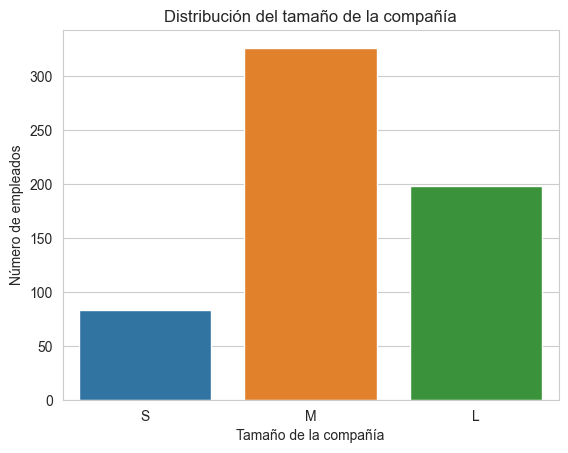

In [381]:
order = ['S', 'M', 'L'] 

sns.countplot(x='Tamanio_de_compania', data=df_salary, order=order)

plt.title('Distribución del tamaño de la compañía')
plt.xlabel('Tamaño de la compañía')
plt.ylabel('Número de empleados')

plt.show() 

## 📈 Analisis Bivariado y respuestas a las preguntas

### El nivel de salario aumenta en base a la cantidad de experiencia?


Comienzo por utilizar un boxplot para graficar el nivel de salario en relación con el nivel de experiencia. La respuesta clara: a medida que aumenta la experiencia, también lo hacen los salarios. En este boxplot se puede apreciar que el nivel salarial más bajo se encuentra en la categoría de entry, seguida por mid junior, y posteriormente senior y Ejecutivo. 
Siendo la media del Junior unos 56k y la media de un ejecutivo 171k.

In [382]:
boxplotmedian = df_salary.groupby('Nivel_de_experiencia')['Salario_en_dolares'].median().sort_values()
px.box(df_salary, x='Nivel_de_experiencia', y='Salario_en_dolares', category_orders={"Nivel_de_experiencia": boxplotmedian.index})

### Salarios en medida de los años

Al momento de graficar los datos de los salarios en relacion de los años, podemos darnos cuenta de un aumento constante, pero pequeño. dado que la media en el 2020 era de 75k (recordemos que realizamos una escala logaritmica) Y en el 2022 podemos hayar una media de 120k. Es importante ver que, a pesar de todo, en años posteriores teniamos outliers que sobrepasan con amplia cantidad, a candidatos en posiciones similares pero actuales.
Fuente: https://www.datacamp.com/blog/data-science-salaries

In [383]:
boxplotyear = df_salary.groupby('Anio_Laboral')['Salario_en_dolares'].median().sort_values()
fig = px.box(df_salary, y='Salario_en_dolares', x='Anio_Laboral')
fig.update_layout(xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=True, zeroline=False))
fig.show()


### Salarios remotos, hibridos y precenciales.

Finalmente, visualicé los salarios mediante un boxplot, agrupados por la forma de trabajar: 0 indica trabajo presencial y 100 trabajo remoto. Al incluir el nivel de experiencia, noté que, aunque no es lo que se podría esperar, hay algunos trabajadores senior ganando más que los expertos que trabajan en remoto. Además, se observa que los salarios en formato de dólares son ligeramente más altos en trabajos remotos que en los presenciales. Sin embargo, también se identificaron outliers en el gráfico.

In [384]:
fig = px.box(df_salary, x='Ratio_remoto', y='Salario_en_dolares', title="Boxplot Ratio Remoto vs Salario")
fig.show()


### Titulo mejor pagado.

Procededemos a organizar los datos ordenando los títulos de trabajo por nivel de salario. De esta manera, obtuvimos una lista de los títulos de trabajo en orden ascendente de salario. Según los datos, el título de trabajo mejor pagado es "Data Analytics lead", seguido por "Principal Data Engineer" y "Financial data Analyst". Es importante destacar que existen algunos valores atípicos (outliers) que cobran bastante más que la media del salario del puesto de "Data Analytics lead

<function matplotlib.pyplot.show(close=None, block=None)>

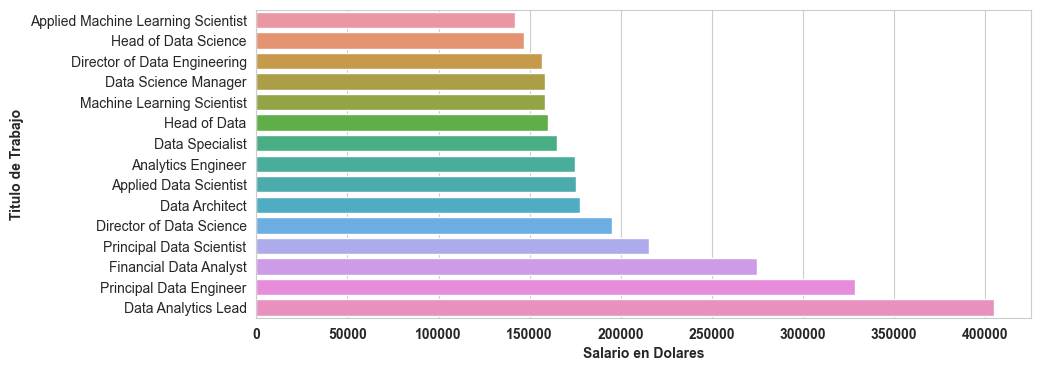

In [385]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sorted_jobs = df_salary.groupby('Titulo_de_trabajo')['Salario_en_dolares'].mean().sort_values().iloc[35:].index
sns.barplot(data=df_salary, y='Titulo_de_trabajo', x='Salario_en_dolares', order=sorted_jobs, orient= 'h', errorbar=None)
plt.xticks(weight = 'bold')
plt.xlabel('Salario en Dolares', fontweight='bold' )
plt.ylabel('Titulo de Trabajo', fontweight='bold')
plt.show

### Numero de trabajadores.


En este caso, al responder a la pregunta sobre la distribución de los trabajadores según su modalidad de trabajo, podemos observar que la mayoría trabaja en modalidad remota, seguido por aquellos que trabajan de manera presencial y en tercer lugar se encuentra la modalidad híbrida.

Sin embargo, posteriormente me di cuenta de que la visualización que utilicé (un histograma) no era la más adecuada para mostrar la cantidad de datos por cada categoría. Después de recibir una recomendación, cambié a un countplot que es una herramienta más natural para este propósito. Gracias a esto, pude notar que la cantidad de personas que trabajan en remoto es significativamente mayor a la de las otras dos modalidades.

<function matplotlib.pyplot.show(close=None, block=None)>

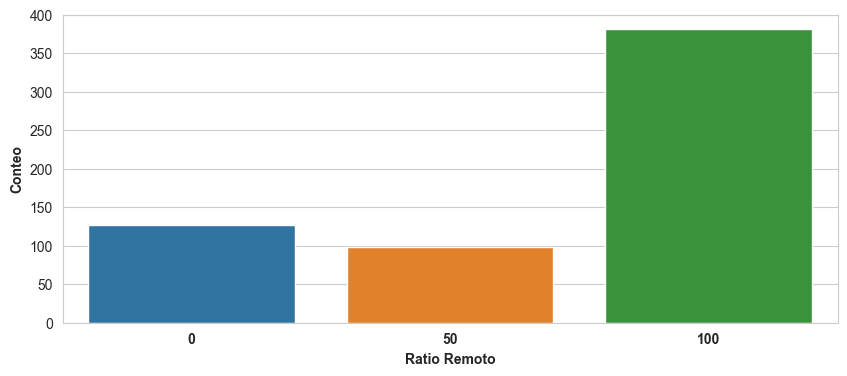

In [386]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.countplot(data=df_salary,x='Ratio_remoto')
plt.xticks(weight = 'bold')
plt.xlabel('Ratio Remoto', fontweight='bold' )
plt.ylabel('Conteo', fontweight='bold')
plt.show

### Tamaño de la compañia

La información que presentamos aquí es un poco más compleja, por lo que intentaremos ser detallados. 

* En primer lugar, es importante destacar que el punto más alto del bigote en la caja de los datos de las compañías más pequeñas es inferior en comparación con las compañías medianas o grandes, lo que sugiere que, en general, las compañías pequeñas pagan salarios más bajos.

* No obstante, hay que tener en cuenta que las compañías grandes suelen tener outliers que presentan una cantidad bastante sobresaliente de salarios más altos. Esto se debe a que, a diferencia de las demás, las compañías grandes tienen más recursos para ofrecer salarios más altos a empleados con niveles de experiencia más altos. (Fuente: https://www.datacamp.com/blog/data-science-salaries)

* Por otro lado, podemos notar que el salario mínimo en las compañías grandes es más alto que en sus competidoras. No obstante, la media salarial en las compañías medianas es mayor. Estos resultados pueden deberse a diversos factores, como la complejidad de los trabajos, la competitividad del mercado laboral y la ubicación geográfica de las empresas.

* En general, los datos nos sugieren que las compañías grandes tienen mayores recursos para ofrecer salarios más altos, pero que las compañías medianas pueden ser más competitivas en términos de salarios medios. Es importante tener en cuenta que la interpretación de los datos puede estar influenciada por múltiples factores y que se necesitaría un análisis más profundo para confirmar estas hipótesis.


In [387]:
boxplot_company = df_salary.groupby('Tamanio_de_compania')['Salario_en_dolares'].median().loc[['S', 'M', 'L']].index
fig = px.box(df_salary, x='Tamanio_de_compania', y='Salario_en_dolares', 
             category_orders={'Tamanio_de_compania': boxplot_company},
             color_discrete_sequence=['#636EFA'],
             title='Salarios en función del tamaño de la compañía',
             labels={'Tamanio_de_compania': 'Tamaño de la compañía', 'Salario_en_dolares': 'Salario en dólares'})
fig.show()


### Tipo de contratacion

Podemos observar en este grafico, que el salario de los que estan bajo contrato son mas altos, sin embargo debemos tener en cuenta, de que nuestro conjunto de datos apenas tiene informacion sobre los diferentes tipos de contratacion a excepcion de "Full-time".


<function matplotlib.pyplot.show(close=None, block=None)>

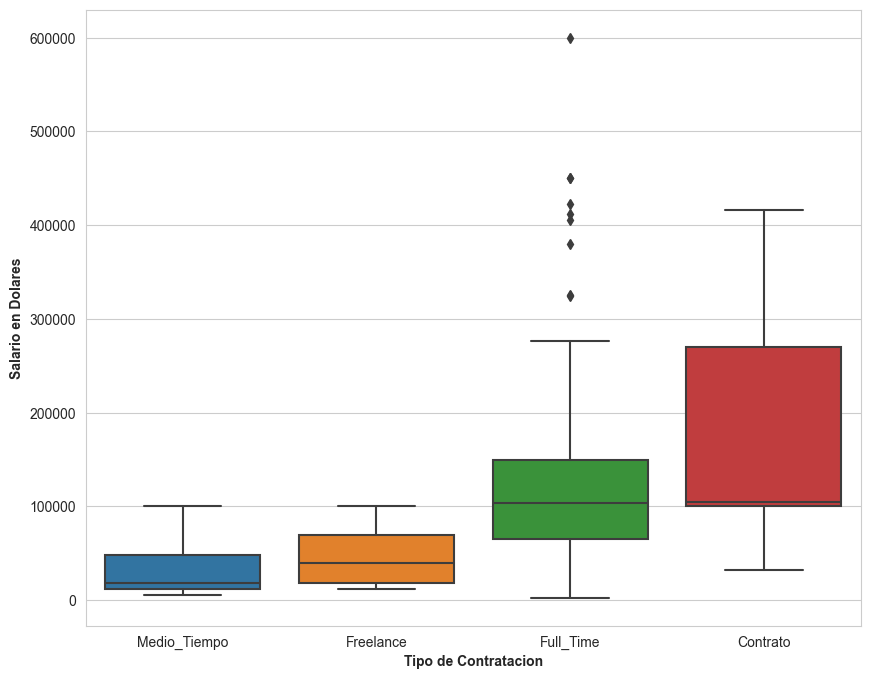

In [388]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.boxplot(data=df_salary, x='Tipo_de_contrato', y='Salario_en_dolares', order=['Medio_Tiempo','Freelance','Full_Time','Contrato'])
plt.xlabel('Tipo de Contratacion', fontweight='bold')
plt.ylabel('Salario en Dolares', fontweight='bold')
plt.show

### Salario por Recidencia

En este caso vemos que los salarios se encuentras ubicados por residencia y de mayor a menor, hemos quitado los valores del conteo menor a 15, por que me estaba representando un sesgo de informacion
*  El salario en los Estados Unidos es el mas alto, superando los  los 140.000
*  El segundo puesto se lo atribuye a Canada, siguiendo a este Alemania

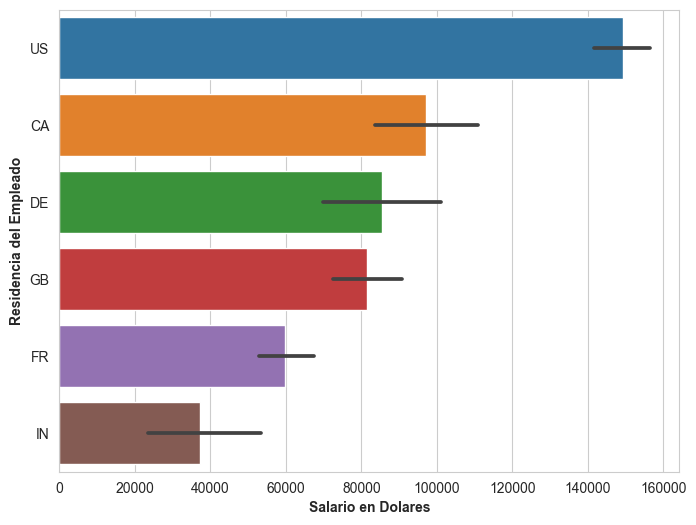

In [389]:
Conteo_residencia = df_salary["Residencia_del_empleado"].value_counts()
Categoria_interes = value_counts[value_counts > 15].index.tolist()
df_salary = df_salary[df_salary["Residencia_del_empleado"].isin(Categoria_interes)]



sorted_residence = df_salary.groupby('Residencia_del_empleado')['Salario_en_dolares'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_salary, y='Residencia_del_empleado', x='Salario_en_dolares', order=sorted_residence, orient='h')
plt.xlabel('Salario en Dolares', fontweight='bold')
plt.ylabel('Residencia del Empleado', fontweight='bold')
plt.show()


## Conclusion 

Gracias a este análisis exploratorio, nos podemos dar cuenta de varias cosas.
<ol>
<li>La variable objetiva a querer predecir será Salario en Dólares, por su importancia y objetividad, además de su correlación que veremos próximamente

<li>Podemos sacar varias conclusiones, pero nos damos cuenta de que las variables más importantes las vemos en los niveles de experiencia, la localización del empleado y donde está ubicada la compañía

<li>Nuestros datos no son lineales, vemos mucha variedad en los datos

<li>Tenemos poca información en algunas columnas, que puede representar un problema el momento de realizar MachineLearning, como pueden ser la cantidad vista en el análisis uni variado, en donde en algunas columnas predominaban por una amplia mayoría datos de un tipo

<ol>


# 🧐Feature Selection

### Método de filtro

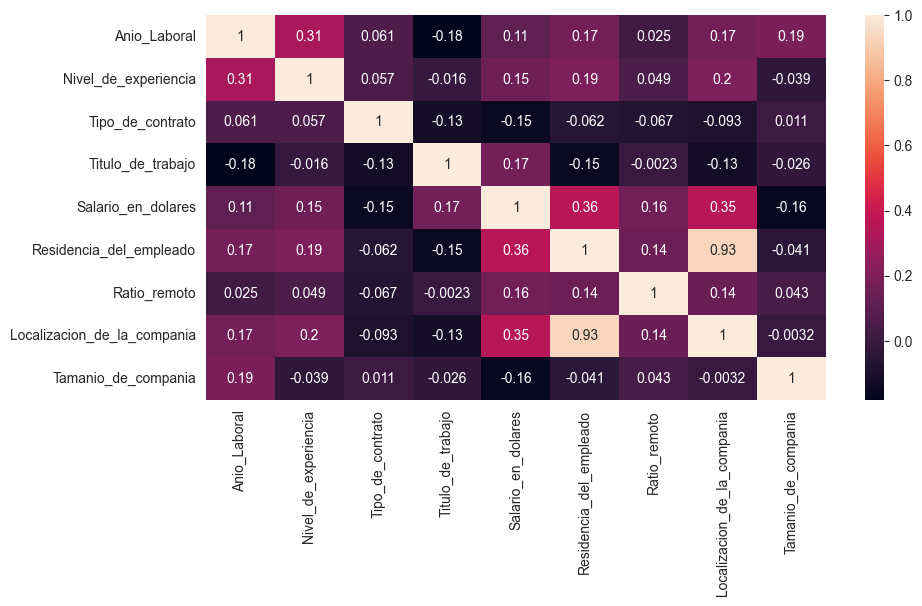

In [390]:
corrsalaryML=df_salaryML_LabelEncoder.corr()
plt.figure(figsize=(10,5))
heatmap=sns.heatmap(corrsalaryML, annot=True)
sns.color_palette("flare", as_cmap=True)
plt.show()

Al aplicar el método de filtro, puedo ver las variables que tienen más correlación con mi variable objetivo, en este caso sería "Salario en dólares" Que será el valor a predecir, viendo la correlaciones de las variables me doy cuenta de que puedo realizar 2 predicciones. <br>
Por un lado, puedo predecir el aumento del salario con base en los años, y por el otro puedo  ver por la residencia, y la localización de la compañía con su nivel de experiencia, calcular el salario aproximado que tendría por ejemplo un residente de argentina, junior que trabajara para una empresa en los estados unidos, intentaré basar mi trabajo en estas dos primicias. <br>
**Para este trabajo en particular, voy a elegir esas variables**



## Luego del metodo de filtro, intentare realizar un foward selection o un step wise, para comprobar mis resultados anteriores.

In [391]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.ensemble import  AdaBoostRegressor
import xgboost as xgb


#### Tanda #1 k features 5

In [392]:
salarySFS = df_salaryML_LabelEncoder.copy()

X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df1= salarySFS[list(sfs.k_feature_names_)]
df1

C:\Users\leand\AppData\Local\Temp\ipykernel_15932\3238975332.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



KeyError: "['salary_in_usd'] not found in axis"

En este caso con K feature 3, podemos comprobar nuestra teoria con el metodo de filtro, de todas formas, variaremos un poco para tener varios ejemplos.

#### Tanda #2 k features 7

In [ ]:
X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=7, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df2= salarySFS[list(sfs.k_feature_names_)]
df1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 1/7 -- score: 0.20390349731851964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 2/7 -- score: 0.24788980040804542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 3/7 -- score: 0.2756393693691498[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Index(['work_year', 'experience_level', 'job_title', 'salary',
       'salary_currency', 'employee_residence', 'company_size'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 5/7 -- score: 0.2990567216921708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 6/7 -- score: 0.302709757967918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-09 17:36:50] Features: 7/7 -- score: 0.30474586669407755

,experience_level,job_title,salary_currency,employee_residence,company_size
0,2,22,7,14,0
1,3,41,16,32,2
2,3,7,8,20,1
3,2,47,16,23,2
4,3,38,16,55,0
...,...,...,...,...,...
602,3,17,16,55,1
603,3,17,16,55,1
604,3,12,16,55,1
605,3,12,16,55,1


#### Tanta #3 k features 10

In [ ]:
X = salarySFS.drop(['salary_in_usd'],1)
y = salarySFS['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()


sfs = SequentialFeatureSelector(lr, k_features=10, forward=True, verbose=2, scoring='r2', cv=5)

# Ejecutar el forward selection
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

df3= salarySFS[list(sfs.k_feature_names_)]
df1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 1/10 -- score: 0.20390349731851964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 2/10 -- score: 0.24788980040804542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 3/10 -- score: 0.2756393693691498[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 5/10 -- score: 0.2990567216921708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 6/10 -- score: 0.302709757967918[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 7/10 -- score: 0.30474586669407755[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-05-09 17:36:51] Features: 8/10 -

,experience_level,job_title,salary_currency,employee_residence,company_size
0,2,22,7,14,0
1,3,41,16,32,2
2,3,7,8,20,1
3,2,47,16,23,2
4,3,38,16,55,0
...,...,...,...,...,...
602,3,17,16,55,1
603,3,17,16,55,1
604,3,12,16,55,1
605,3,12,16,55,1


**Voy a detenerme aqui, por que no creo que un k feature mas alto me de varianza en mis datos, dado que estamos comprobando que estan todas las columnas.

# 💻Machine Learning

### Normalizacion

In [ ]:
scaler = MinMaxScaler()
df_salaryML_Normalizado = df_salaryML_LabelEncoder.copy()
df_salaryML_Normalizado['salary_in_usd'] = scaler.fit_transform(df_salaryML_LabelEncoder[['salary_in_usd']])

## Random forest

### Random forest

In [ ]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



MSE: 2061695880.380151
RMSE: 45405.901382751465
R²: 0.46205905610801956


Actualizacion 1: Random forest creado.<br>
Actualizacion 2: Introducir nuevo parametro, max_depth. Al ponerlo en 5, aumenta un 1% mi r2<br>
Actualizacion 3: Procedere a realizar la misma prueba con los datos normalizados.

### Random forest mejorado, con grafico.

**Procedo a mejorar la prueba del random forest inicial, pero con mas medidas.**

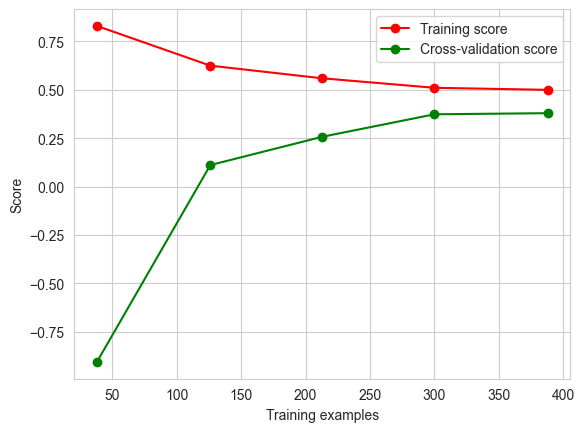

Métricas en los datos de entrenamiento:
R²: 0.4901303084599583
MSE: 2707325525.0592613
RMSE: 52031.96637701925
Métricas en los datos de prueba:
R²: 0.4524894839122161
MSE: 2098371927.8108332
RMSE: 45807.98978137802


In [ ]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(rf_model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




RandomForestR2_train = r2_score(y_train, y_train_pred)
RandomForestMSE_train = mean_squared_error(y_train, y_train_pred)
RandomForestRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


RandomForestR2_test = r2_score(y_test, y_test_pred)
RandomForestMSE_test = mean_squared_error(y_test, y_test_pred)
RandomForestRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Actualizacion 1: Utilizando un test_size=0.2 pude notar un poco de sobreajuste sobre el modelo, al ver los valores del MSE. <br>
Actualizacion 2: Limite aun mas la particion del test_size a 0.1, pude notar una mejora en los datos de prueba, bajando el MSE y RMSE. <br>
Actualizacion 3: Al limitar los datos al 5%, puedo ver una gran mejora del r2, ademas de bajar los valores del MSE y RMSE, por lo que puedo estar teniendo un caso de sobreajuste, sin embargo no deja de representar una mejora, podria mejorar este modelo realizando una validacion cruzada, pero que por ahora no vimos en clase, me gustaria ademas, poder explorar los parametros.
Actualizacion 4: Para evitar la sobreadaptabilidad con el caso del 5% que tuve en mis datos (son pocos) buscare lograr la mejora a partir del 20% de los datos.

## AdaBoost

### Adaboost Inicial

In [ ]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaBoost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



MSE: 2443348429.690936
RMSE: 49430.238009652916
R²: 0.3624776704299493


### Adaboost con grafico

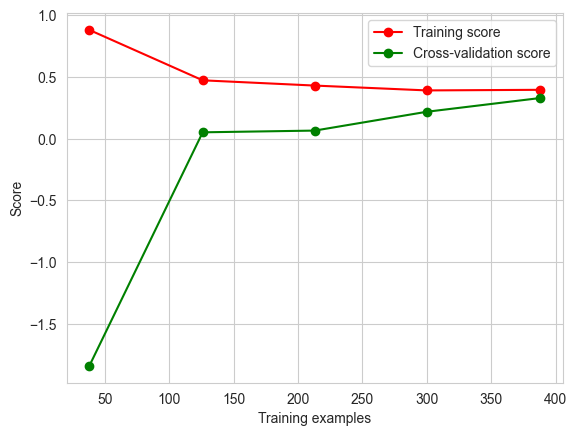

Métricas en los datos de entrenamiento:
R²: 0.4168696243654786
MSE: 3096327898.260163
RMSE: 55644.65740985529
Métricas en los datos de prueba:
R²: 0.35992445587122257
MSE: 2453133801.1099043
RMSE: 49529.12073830813


In [ ]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaBoost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaBoost.fit(X_train, y_train)

y_train_pred = adaBoost.predict(X_train)
y_test_pred = adaBoost.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(adaBoost, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))



AdaboostR2_train = r2_score(y_train, y_train_pred)
AdaboostMSE_train = mean_squared_error(y_train, y_train_pred)
AdaboostRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


AdaboostR2_test = r2_score(y_test, y_test_pred)
AdaboostMSE_test = mean_squared_error(y_test, y_test_pred)
AdaboostRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

## XGBoost

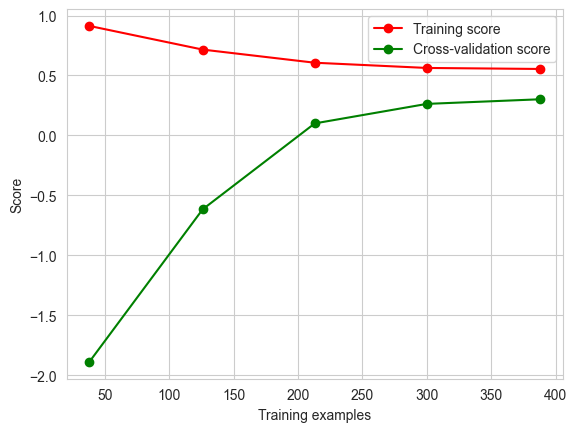

Métricas en los datos de entrenamiento:
R²: 0.5421021781133805
MSE: 2431363310.3357906
RMSE: 49308.85630731857
Métricas en los datos de prueba:
R²: 0.44059221254541414
MSE: 2143969043.336633
RMSE: 46303.01332890369


In [ ]:
X = df_salaryML_LabelEncoder[['experience_level', 'employee_residence', 'company_location', 'remote_ratio']]
y = df_salaryML_LabelEncoder['salary_in_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost = xgb.XGBRegressor(n_estimators=100, random_state=42)
XGBoost.fit(X_train, y_train)

y_train_pred = XGBoost.predict(X_train)
y_test_pred = XGBoost.predict(X_test)


train_sizes, train_scores, val_scores = learning_curve(XGBoost, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', color="g",
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")

plt.show()

# Calcular las métricas de evaluación en los datos de entrenamiento y prueba
print('Métricas en los datos de entrenamiento:')
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('Métricas en los datos de prueba:')
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))




XGBoostR2_train = r2_score(y_train, y_train_pred)
XGBoostMSE_train = mean_squared_error(y_train, y_train_pred)
XGBoostRMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

XGBoostR2_test = r2_score(y_test, y_test_pred)
XGBoostMSE_test = mean_squared_error(y_test, y_test_pred)
XGBoostRMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Conclusion

Analisando brevemente los datos, por orden <br>
<br>
El random forest presenta leves signos de Overfitting. El r2 y el MSE en entrenamiento son mejores que en la practica/prueba. Ademas, al momento de realizar la Cross Validation, podemos ver que a pesar de que en entrenamiento baja, y la CVScore aumenta, sigue siendo mas alto. Por lo tanto concluyo que tiene sobreajuste. <br>
<br>
Con el Adaboost podemos concluir simplemente con lo mediocre que dan las puntuaciones, que no es el mejor modelo para nuestros datos. Si bien queda probar con el OneHotEncoder, los resultados no son esperanzadores. <br>
<br>
Y finalmente con el GXBoost, tenemos un problema parecido al random forest, con diferencia de que el MSE nos indica que esta ligeramente sobreajustado, lo que sugiere que por un lado, el modelo no se termina de adaptar a los datos. Tengo en mente, que el problema pueda ser por el tipo de encoder, viendo los resultados. Intentare mejorar para el proximo entregable el tipo de codificacion.<br>
<br>
Otra de las conclusiones que sacamos de estos modelos, gracias al MSE o error cuadratico, es que nuestros modelos fallan... Y por mucho.<br>
En este caso, tendremos que trabajar formas de mejorar no solo el r2, si no que tambien el error. Los modelos presentados no solo no tienen un buen indice de acierto, si no que llegan a un numero muy alto de error dando resultados muy dispersos, por el otro lado, se ve que la seed de aleatoriedad de los datos esta bien ejemplificada.

# ✅ Valoracion de Algoritmos

## Grafico R2

En este caso, realice un grafico que comprara distintos modelos de regresion para mis datos. Puedo notar que mi random forest, con un tamaño del 5% de los datos de testeo, es el que tiene una mejora con respecto a sus competidores. El XGBoost con un tamaño del 10% y uno con el 20% no marca tanto la diferencia, pero si se ponen por encima, o en valores iguales que el random forest al 20%. <br>
Puedo concluir que actualmente, dada la cantidad de conocimiento que tengo (aun que queda por debatir o mejorar si el random forest presenta casos de adaptamiento, o overfitting) y el conocimiento actual de los modelos que conozco, me convendria realizarlo tanto por random forest, como por XGBoost.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']

# Crear una lista con los errores de cada modelo
r2 = [RandomForestR2_train, RandomForestR2_test, AdaboostR2_train, AdaboostR2_test, XGBoostR2_train, XGBoostR2_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo

# Crear un gráfico de barras

fig = px.bar(x=model_names, y=r2, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de determinación (R^2)")


## Grafico MSE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']


# Crear una lista con los errores de cada modelo
errors = [RandomForestMSE_train, RandomForestMSE_test, AdaboostMSE_train, AdaboostMSE_test, XGBoostMSE_train, XGBoostMSE_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errors, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error MSE")

## Grafico RMSE

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista con los nombres de los modelos
model_names = ['Random Forest Train', 'Random Forest Test', 'AdaBoost Train', 'AdaBoost Test', 'XGBoost Train','XGBoost Test']


# Crear una lista con los errores de cada modelo
errorsR = [RandomForestRMSE_train, RandomForestRMSE_test, AdaboostRMSE_train, AdaboostRMSE_test, XGBoostRMSE_train, XGBoostRMSE_test] # Reemplazar rf_error, ab_error, xgb_error con los valores de error obtenidos para cada modelo


fig = px.bar(x=model_names, y=errorsR, width=1200, height=600, color_discrete_sequence=px.colors.sequential.Viridis )
fig.update_xaxes(title_text="Modelos")
fig.update_yaxes(title_text="Coeficiente de Error RMSE")